In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("27-car_evaluation.csv")

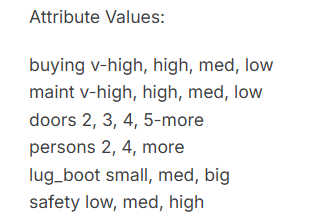

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


- Kolon isimleri gördüğümüz üzere baya saçma o yüzden bunlara düzenleme yapacağım.

In [4]:
df.columns = ["buying", "maint", "doors", "persons", "log_boot", "safety", "class"]

In [5]:
df.head()

,buying,maint,doors,persons,log_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   log_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
log_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


- Bazı saçma değerler var. Numerik vs bile olmayan "5more" gibi. Bunlara düzenleme getireceğim.

- doors, persons : Numerical
- buying, maint, log_boot, safety : Categorical
- class : target

In [8]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
log_boot    0
safety      0
class       0
dtype: int64

In [9]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [10]:
df["doors"] = df["doors"].replace(to_replace='5more', value='5')

In [11]:
df["doors"] = df["doors"].astype(int)

In [12]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [13]:
df["persons"] = df["persons"].replace(to_replace='more', value='5')

In [14]:
df["persons"] = df["persons"].astype(int)

In [15]:
df["doors"].unique(), df["persons"].unique()

(array([2, 3, 4, 5]), array([2, 4, 5]))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int32 
 3   persons   1727 non-null   int32 
 4   log_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int32(2), object(5)
memory usage: 81.1+ KB


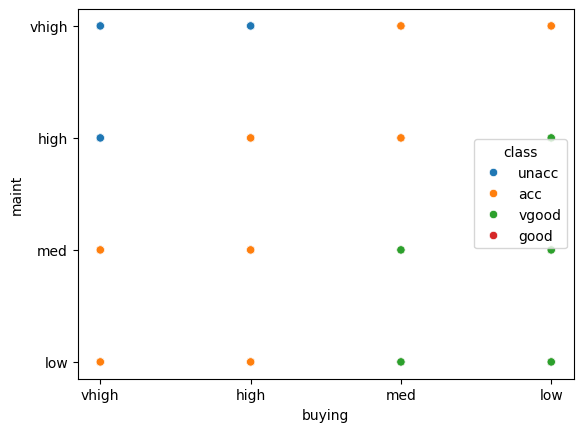

In [17]:
sns.scatterplot(x=df["buying"], y=df["maint"], hue=df["class"])
plt.show()

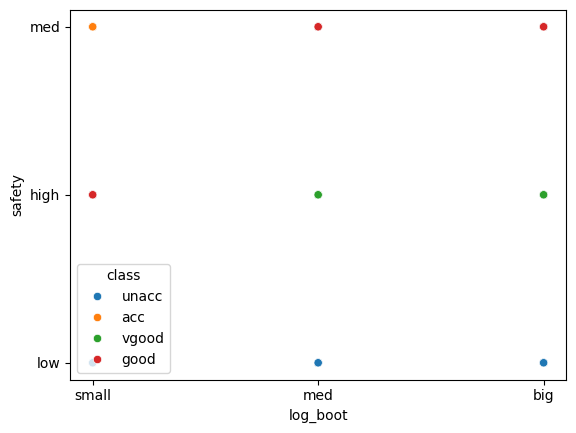

In [18]:
sns.scatterplot(x=df["log_boot"], y=df["safety"], hue=df["class"])
plt.show()

In [19]:
X =df.drop('class', axis = 1)
y = df["class"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [22]:
X_train.shape

(1208, 6)

- Burada kategorik değişkenler için Ordinal Encoding yapmak en mantıklısı. Çünkü small, med, big diyerek artıyor.

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

- Normalde düz ordinal Encoder oluşturarak yapabiliriz. Ama burada yaptığımız profesyonel ve çok kullanışlı encoder oluşturucu olack.

In [24]:
categorical = []
numerical = []

for col in df.drop('class', axis=1).columns:
    if df[col].dtype == 'O':
        categorical.append(col)
    else:
        numerical.append(col)

In [25]:
categorical

['buying', 'maint', 'log_boot', 'safety']

In [26]:
numerical

['doors', 'persons']

In [27]:
for col in categorical:
    print(col,df[col].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
log_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']


In [28]:
ordinal_encoder = OrdinalEncoder(categories=[
    ['low', 'med', 'high', 'vhigh'],   # buying
    ['low', 'med', 'high', 'vhigh'],   # maint
    ['small', 'med', 'big'],   # log_boot
    ['low', 'med', 'high']    # safety
])   # Normalde kendisi kategoriyi auto olarak veriyor ama biz kendimiz vereceğiz. Sırayla vereceğim.

In [29]:
preprocessor = ColumnTransformer(transformers=[
    ('transformation_name_doesnt_matter', ordinal_encoder, categorical),
], remainder='passthrough')    # Burada yine transformer parametresini kullanarak encodingi otomatik hale getiriyoruz.

In [30]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3)    
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [33]:
tree_model.fit(X_train_transformed, y_train)
y_pred = tree_model.predict(X_test_transformed)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.7861271676300579
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519

Confusion Matrix: 
 [[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

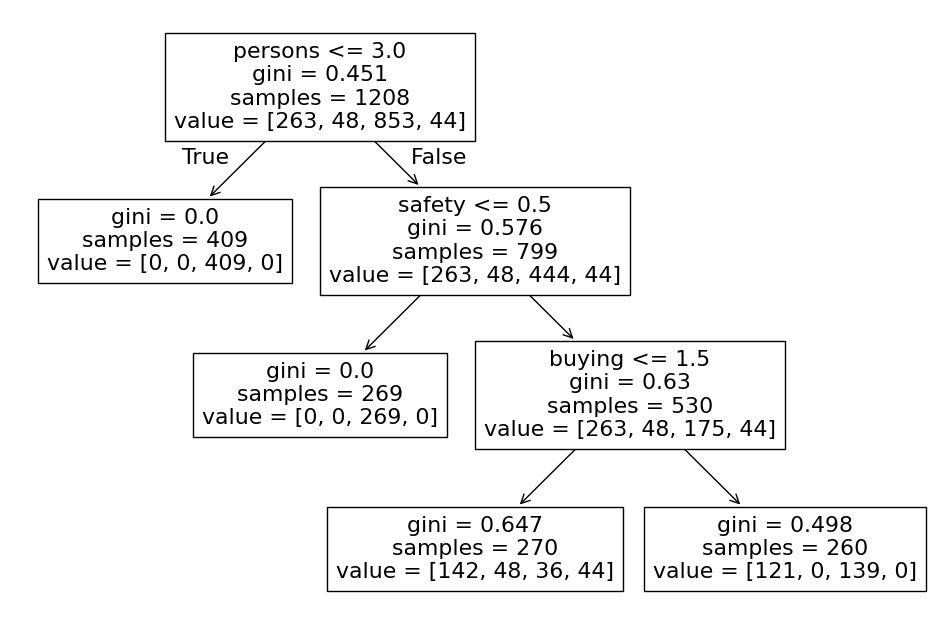

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

column_names = categorical + numerical

tree.plot_tree(tree_model.fit(X_train_transformed, y_train), feature_names = column_names)

In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [38]:
param = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5,12,15,20,None],
    'max_features' :  ["sqrt", "log2", None]
}

In [39]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param, refit=True, cv= StratifiedKFold())

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 12, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [42]:
y_pred = grid.predict(X_test_transformed)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9730250481695568
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519

Confusion Matrix: 
 [[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]


In [43]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 20,
 'max_features': None,
 'splitter': 'best'}

In [45]:
tree_model_new = DecisionTreeClassifier(criterion="entropy",max_depth=None, max_features=None, splitter="best")
tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730250481695568
[[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



[Text(0.6140202702702703, 0.9615384615384616, 'persons <= 3.0\nentropy = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.6005067567567568, 0.8846153846153846, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.6072635135135136, 0.9230769230769231, 'True  '),
 Text(0.6275337837837838, 0.8846153846153846, 'safety <= 0.5\nentropy = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.620777027027027, 0.9230769230769231, '  False'),
 Text(0.6140202702702703, 0.8076923076923077, 'entropy = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6410472972972973, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.641\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.40371621621621623, 0.7307692307692307, 'maint <= 1.5\nentropy = 1.745\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.19932432432432431, 0.6538461538461539, 'safety <= 1.5\nentropy = 1.805\nsamples = 134\nvalue = [43, 48, 8, 35]'),
 Text(0.08108108108108109, 0.5769230769230769, 'log_boot <= 0

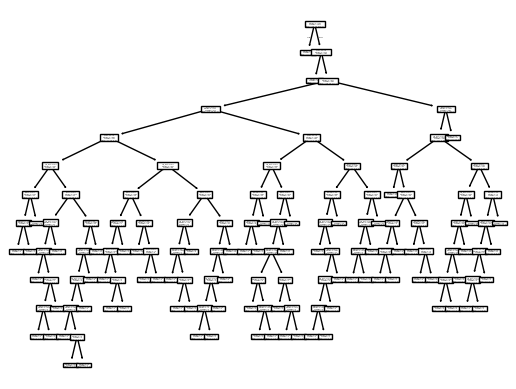

In [46]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train),feature_names=column_names)
